## Category 변수의 표현 방법

- One-Hot Encoding
    - pd.get_dummies

## Numeric 실수형 변수의 표현 방법

- 사용하는 모델에 따라 표현 방식이 달라질 수 있다

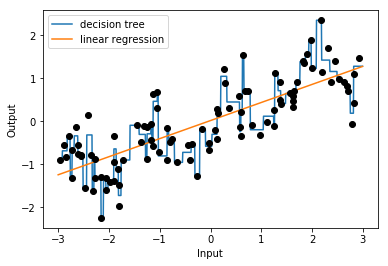

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Output")
plt.xlabel("Input")
plt.legend(loc="best")

연속형 모델에는 모든 데이터를 표현하는 것이 아닌, 구간 분할(이산화 : bining)을 시도할 수 있다.

In [6]:
###### bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

# 10개의 구간을 분할
# 10: 2.4  ~  3
# 9:  1.8  ~  2.4
# 8:  1.2  ~  1.8
# 7:  0.6  ~  1.2
# 6:  0    ~  0.6
# 5:  -0.6 ~  0
# 4:  -1.2 ~ -0.6 
# 3:  -1.8 ~ -1.2
# 2:  -2.4 ~ -1.8
# 1:  -3   ~ -2.4

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [9]:
which_bin = np.digitize(X, bins=bins)
print("\n데이터:\n", X[:5])
print("\n데이터가 속한 구간:\n", which_bin[:5])


데이터:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터가 속한 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print("데이터가 속한 구간 One-hot Encoding :\n", X_binned[:5])

데이터가 속한 구간 One-hot Encoding :
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Text(0.5,0,'Input feature')

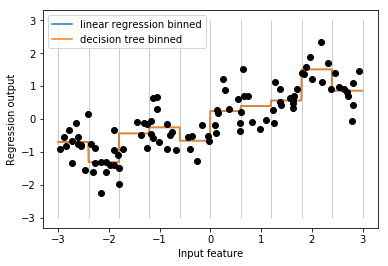

In [14]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

## Interaction & Polynomial

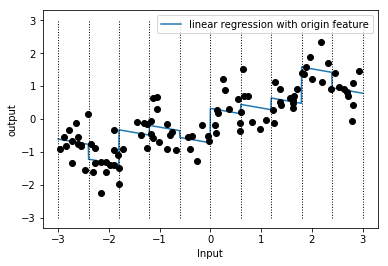

In [18]:
X_combined = np.hstack([X, X_binned])

reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression with origin feature')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("output")
plt.xlabel("Input")
plt.plot(X[:, 0], y, 'o', c='k')

In [20]:
X_product = np.hstack([X_binned, X * X_binned])

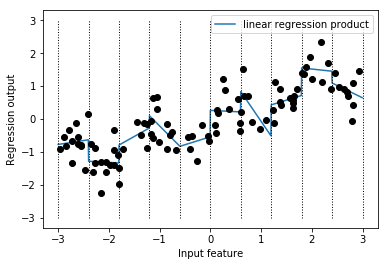

In [21]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [25]:
print("X_poly.shape: {}\n".format(X_poly.shape))
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

X_poly.shape: (100, 10)

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [26]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


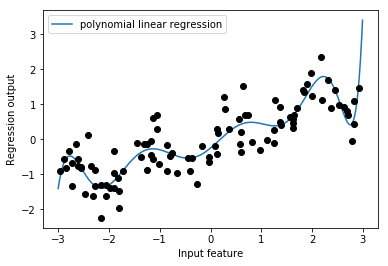

In [27]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

다항 회귀를 통해 부드러운 곡선의 형태를 구현할 수 있다

## log & exp를 이용한 비선형 변환

In [29]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Text(0.5,0,'Value')

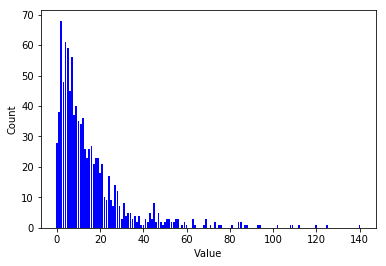

In [31]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='blue')
plt.ylabel("Count")
plt.xlabel("Value")

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [35]:
# log(x+1) 적용

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5,0,'Value')

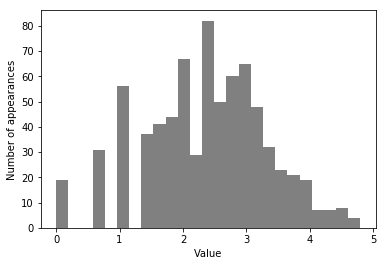

In [36]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [37]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


## Feature Selection (auto)

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 난수 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성 추가
# 첫 30개는 원본 특성, 그 다음 50개는 노이즈 특성
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif와 SelectPercentile을 통해  50%만 선택
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

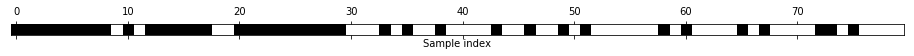

In [41]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

30번 이후의 노이즈 특성이 제거된 것을 확인할 수 있다

In [42]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 feature를 사용한 경우: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("노이즈를 제거한 경우: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

전체 feature를 사용한 경우: 0.930
노이즈를 제거한 경우: 0.940


## Model Based Feature Selection

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

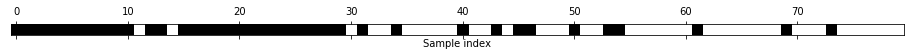

In [45]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [47]:
X_test_l1 = select.transform(X_test)
score1 = LogisticRegression().fit(X_train, y_train).score(X_test, y_test)
print("Test score original: {:.3f}".format(score1))
score2 = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score feature selected: {:.3f}".format(score2))

Test score original: 0.930
Test score feature selected: 0.951


## Feature Selection through Iteration

([], <a list of 0 Text yticklabel objects>)

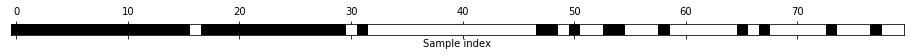

In [49]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [50]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score (selected): {:.3f}".format(score))

print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score (selected): 0.951
Test score: 0.951
